In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

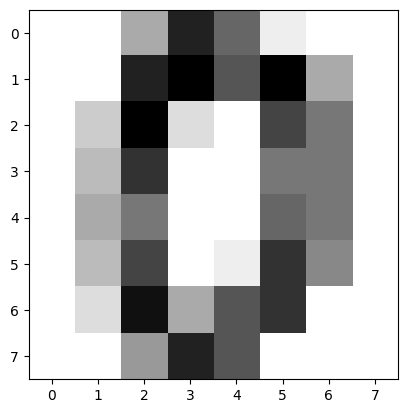

In [ ]:
digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

X = digits.data  # 이미지 데이터 (8x8 이미지를 64개의 특성으로 펼친 형태)
y = digits.target # 각 이미지에 해당하는 숫자 (0~9)

In [ ]:
# 데이터 정규화 (Standardization)
# 픽셀 값을 0~16 사이에서 평균 0, 표준편차 1인 값으로 변환
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 레이블을 원-핫 인코딩(One-Hot Encoding)으로 변환
# 예: 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_categorical = to_categorical(y, num_classes=10)

In [ ]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

print(f"훈련 데이터 형태: {X_train.shape}")
print(f"테스트 데이터 형태: {X_test.shape}")

훈련 데이터 형태: (1437, 64)
테스트 데이터 형태: (360, 64)


In [ ]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(64,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    # 출력층: 10개의 클래스(0~9)에 대한 확률을 출력
    layers.Dense(10, activation="softmax")
])

# 모델 구조 요약 출력
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,226 (67.29 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

In [ ]:
# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3824 - loss: 1.9019 - val_accuracy: 0.9340 - val_loss: 0.5336
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8858 - loss: 0.5044 - val_accuracy: 0.9653 - val_loss: 0.1790
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9435 - loss: 0.2052 - val_accuracy: 0.9792 - val_loss: 0.1043
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9714 - loss: 0.1278 - val_accuracy: 0.9861 - val_loss: 0.0739
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9731 - loss: 0.1120 - val_accuracy: 0.9896 - val_loss: 0.0657
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9892 - loss: 0.0810 - val_accuracy: 0.9861 - val_loss: 0.0547
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9868 - loss: 0.0560 - val_accuracy: 0.9861 - val_loss: 0.0549
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9922 - loss: 0.0447 - val_accuracy: 0.9896 - val_loss:

In [ ]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [ ]:
# 학습 곡선
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

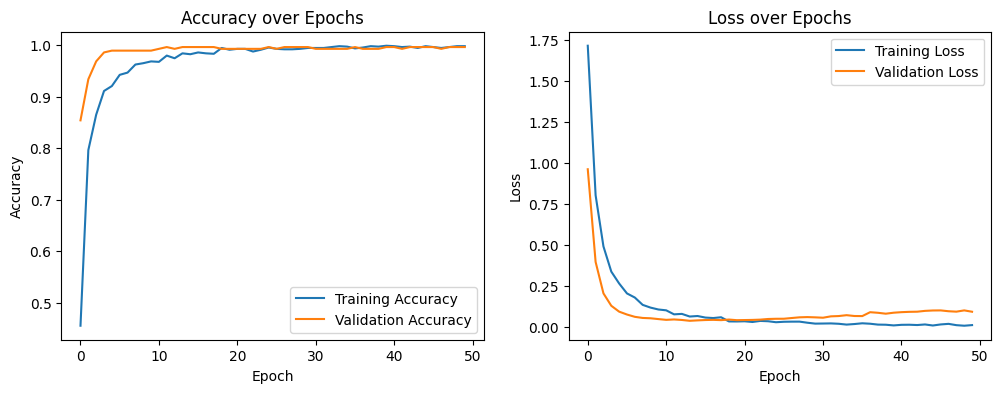

In [ ]:
# 학습 과정 시각화 (정확도 및 손실)
plt.figure(figsize=(12, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

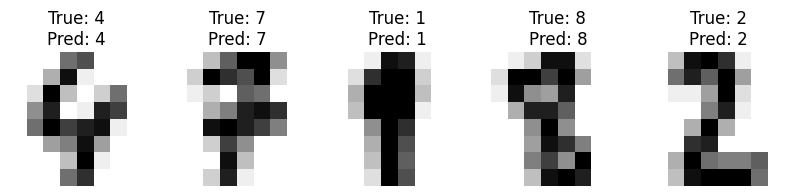

In [ ]:
# 예측 결과 중 일부를 이미지와 함께 출력
n_images = 5
plt.figure(figsize=(10, 4))
for i in range(n_images):
    ax = plt.subplot(1, n_images, i + 1)
    # 원래 이미지 형태로 복원 (64 -> 8x8)
    image = X_test[i].reshape(8, 8)
    # 스케일링 되돌리기 (시각화를 위해)
    image = scaler.inverse_transform(X_test[i].reshape(1, -1)).reshape(8, 8)

    plt.imshow(image, cmap=plt.cm.binary)
    plt.title(f"True: {true_classes[i]}\nPred: {predicted_classes[i]}")
    plt.axis('off')
plt.show()

In [ ]:
#예측 값에 대한 정확도 확인
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.95      0.96        37
           2       0.94      0.97      0.96        35
           3       0.97      0.95      0.96        37
           4       1.00      0.97      0.99        36
           5       1.00      0.94      0.97        36
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       0.88      1.00      0.93        35
           9       0.97      0.92      0.94        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  2  0]
 [ 0  1 34  0  0  0  0  0  0  0]
 [ 0  0  2 35  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 34  0  0  1  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0